In [3]:
import pandas as pd
import numpy as np
import random

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/credit_data.csv')

In [5]:
dataset.shape

(2000, 5)

In [6]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [7]:
dataset.dropna(inplace = True)
dataset.shape

(1997, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


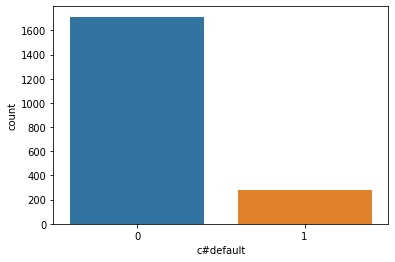

In [8]:
import seaborn as sns
sns.countplot(dataset['c#default']);

In [9]:
x = dataset.iloc[:, 1:4].values

In [10]:
x.shape

(1997, 3)

In [11]:
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [12]:
y = dataset.iloc[:, 4].values

In [13]:
y.shape

(1997,)

In [14]:
y

array([0, 0, 0, ..., 1, 0, 0])

# **BASE DE TREINAMENTO E TESTE**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y)

In [17]:
x_treinamento.shape, x_teste.shape, y_treinamento.shape, y_teste.shape

((1597, 3), (400, 3), (1597,), (400,))

In [18]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [19]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [20]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [21]:
226 / len(y_treinamento)

0.14151534126487164

In [22]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [23]:
57 / len(y_teste)

0.1425

# **CLASSIFICAÇÃO COM NAIVE BAYES**

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
modelo = GaussianNB()
modelo.fit(x_treinamento, y_treinamento)

GaussianNB()

In [26]:
previsoes = modelo.predict(x_teste)

In [27]:
previsoes

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [28]:
y_teste

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(previsoes, y_teste)

0.91

In [31]:
from sklearn.metrics import confusion_matrix 

In [32]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[335,  28],
       [  8,  29]])

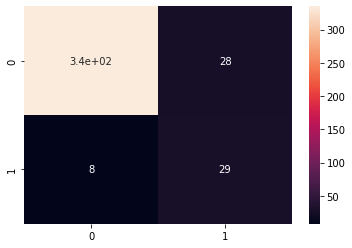

In [33]:
sns.heatmap(cm, annot = True)

In [34]:
(334 + 34) / (334 + 23 + 9 + 34)

0.92

In [35]:
#porcentual de acerto para pessoas que pagam emprestimos
334 / ( 334 + 23)

0.9355742296918768

In [36]:
#porcentual de acerto para pessoas que não pagam emprestimos
34 / (34 + 9)

0.7906976744186046

In [37]:
#Perdas 5.000
#Clientes não pagadores 1.000

In [38]:
1000 * 21 / 100

210.0

In [39]:
210 * 5000

1050000

# **SUBAMOSTRAGEM(UNDERSAMPLING) - TOMEK LINKS**

In [40]:
from imblearn.under_sampling import TomekLinks

In [41]:
tl = TomekLinks(sampling_strategy='majority')
x_under, y_under = tl.fit_resample(x, y)

In [42]:
x_under.shape, y_under.shape

((1897, 3), (1897,))

In [43]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [44]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [45]:
x_treinamento_u, x_teste_u, y_treinamento_u, y_teste_u = train_test_split(x_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify = y_under)

In [46]:
x_treinamento_u.shape, x_teste_u.shape

((1517, 3), (380, 3))

In [47]:
modelo_u = GaussianNB()
modelo_u.fit(x_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(x_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9236842105263158

In [48]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[317,  23],
       [  6,  34]])

In [49]:
312/ (312 + 19)

0.9425981873111783

In [50]:
38 / (38 + 11)

0.7755102040816326

# **SOBREAMOSTRAGEM(OVERSAMPLING) - SMOTE**

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(sampling_strategy='minority')
x_over, y_over = smote.fit_resample(x, y)

In [53]:
x_over.shape, y_over.shape

((3428, 3), (3428,))

In [54]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [55]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [56]:
x_treinamento_o, x_teste_o, y_treinamento_o, y_teste_o = train_test_split (x_over,y_over,test_size=0.2,stratify = y_over)

In [57]:
x_treinamento_o.shape, x_teste_o.shape

((2742, 3), (686, 3))

In [59]:
modelo_o = GaussianNB()
modelo_o.fit(x_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(x_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9169096209912536

In [60]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[301,  15],
       [ 42, 328]])

In [61]:
305 / (305 + 15)

0.953125

In [62]:
328 / (328 + 42)

0.8864864864864865

In [ ]:
#perdas 5.000
#clientes caloteiros 1.000

In [63]:
1000 * 12 / 100

120.0

In [64]:
120 * 5000

600000